## Objective

#### Build a model to predict factors leading to churn in Telecom industry
    -Predict Whether high value customers will churn or not
    -Identify strong predictors of churn  

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,precision_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from datetime import date

#Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [117]:
### View all Columns of dataset
pd. set_option ('display.max_columns', None)

## Read and Understand the Data

In [118]:
df = pd.read_csv('train.csv')

In [119]:
## Sample view of the data
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [120]:
print("**********Shape of the dataset********\n")
print(df.shape)

print("\n*********info of the dataset***************\n")
print(df.info(verbose=True,null_counts=True))


**********Shape of the dataset********

(69999, 172)

*********info of the dataset***************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   o

In [121]:
#identify Coulmns having missing values
df.isnull().sum(axis=0)

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [122]:
df.isnull().sum()[(df.isnull().sum()>0)]

loc_og_t2o_mou            702
std_og_t2o_mou            702
loc_ic_t2o_mou            702
last_date_of_month_7      399
last_date_of_month_8      733
                        ...  
night_pck_user_7        52134
night_pck_user_8        51582
fb_user_6               52431
fb_user_7               52134
fb_user_8               51582
Length: 125, dtype: int64

In [123]:

#Number of columns having missing value in percentage
round(100*df.isnull().sum()[(df.isnull().sum()> 0)]/len(df), 2)

loc_og_t2o_mou           1.00
std_og_t2o_mou           1.00
loc_ic_t2o_mou           1.00
last_date_of_month_7     0.57
last_date_of_month_8     1.05
                        ...  
night_pck_user_7        74.48
night_pck_user_8        73.69
fb_user_6               74.90
fb_user_7               74.48
fb_user_8               73.69
Length: 125, dtype: float64

In [124]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [125]:
# Drop Columns having ~30% missing values 

df.dropna(axis=1,inplace=True,thresh=20000)

In [126]:
df.shape

(69999, 142)

In [127]:
round(100*df.isnull().sum()[(df.isnull().sum()> 0)]/len(df), 2)

loc_og_t2o_mou          1.00
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
                        ... 
ic_others_7             3.84
ic_others_8             5.29
date_of_last_rech_6     1.57
date_of_last_rech_7     1.76
date_of_last_rech_8     3.52
Length: 95, dtype: float64

In [128]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014

In [129]:
# Drop columns where all values are 0.0
df = df.loc[:, df.any()]

In [130]:
#analyze each Column information to understand ditribution of the dataset,identify duplicate, redundant columns, columns candidate for merge, identify derived columns

for col in df:
    print(col + " value counts: ")
    print(df[col].value_counts() , "\n\n")
    print("***************\n")

id value counts: 
0        1
46664    1
46670    1
46669    1
46668    1
        ..
23338    1
23339    1
23340    1
23341    1
69998    1
Name: id, Length: 69999, dtype: int64 


***************

circle_id value counts: 
109    69999
Name: circle_id, dtype: int64 


***************

last_date_of_month_6 value counts: 
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64 


***************

last_date_of_month_7 value counts: 
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64 


***************

last_date_of_month_8 value counts: 
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64 


***************

arpu_6 value counts: 
 0.000      2603
 20.000       72
-5.000        72
 1.000        49
 1.500        38
            ... 
 119.580       1
 393.027       1
 48.879        1
 179.191       1
 168.269       1
Name: arpu_6, Length: 61615, dtype: int64 


***************

arpu_7 value counts: 
 0.000      2666
-5.000       107
 20.000       49
 1.000        38
 1.500

0.00       4356
0.58         34
0.56         33
0.31         32
0.30         28
           ... 
1333.16       1
938.49        1
149.46        1
280.31        1
548.33        1
Name: loc_ic_t2m_mou_6, Length: 19034, dtype: int64 


***************

loc_ic_t2m_mou_7 value counts: 
0.00      3947
0.76        31
0.21        30
2.36        29
0.93        27
          ... 
242.03       1
517.23       1
500.38       1
93.76        1
361.33       1
Name: loc_ic_t2m_mou_7, Length: 18945, dtype: int64 


***************

loc_ic_t2m_mou_8 value counts: 
0.00      3797
0.46        31
0.31        28
0.98        25
1.66        25
          ... 
237.13       1
6.65         1
210.74       1
334.91       1
224.98       1
Name: loc_ic_t2m_mou_8, Length: 19022, dtype: int64 


***************

loc_ic_t2f_mou_6 value counts: 
0.00      27413
0.23        179
0.43        160
0.38        157
0.21        155
          ...  
114.23        1
62.84         1
10.50         1
86.93         1
339.11        1
Name: 

In [131]:
#drop Columns where ~80% of values are 0.0 which will skew the analysis

df = df.drop(['circle_id','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','std_og_t2f_mou_6','og_others_6','og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','std_og_t2f_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','total_ic_mou_7','total_ic_mou_8','total_ic_mou_6','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'],axis=1)

In [132]:
df.shape

(69999, 72)

In [133]:
#Verfiy
df.isnull().sum(axis=0)
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Length: 69999, dtype: int64

In [134]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69999 non-null  int64  
 1   arpu_6              69999 non-null  float64
 2   arpu_7              69999 non-null  float64
 3   arpu_8              69999 non-null  float64
 4   onnet_mou_6         67231 non-null  float64
 5   onnet_mou_7         67312 non-null  float64
 6   onnet_mou_8         66296 non-null  float64
 7   offnet_mou_6        67231 non-null  float64
 8   offnet_mou_7        67312 non-null  float64
 9   offnet_mou_8        66296 non-null  float64
 10  loc_og_t2t_mou_6    67231 non-null  float64
 11  loc_og_t2t_mou_7    67312 non-null  float64
 12  loc_og_t2t_mou_8    66296 non-null  float64
 13  loc_og_t2m_mou_6    67231 non-null  float64
 14  loc_og_t2m_mou_7    67312 non-null  float64
 15  loc_og_t2m_mou_8    66296 non-null  float64
 16  loc_

### Feature Engineering

### ***Treat missing values 

In [135]:
columnList = []   

for col in (df):
    if(df[col].isnull().sum() >= 0):
        mean_val_col = df[col].mean()
        df[col].fillna(value=mean_val_col, inplace=True)
        columnList.append(col)


# Fill missing values with mean of the column value
print(columnList)




['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_

In [136]:
#Verify
print("*************Verify if the dataset has missing values********\n")
print("Missing_values:",df.isnull().sum().sum())

*************Verify if the dataset has missing values********

Missing_values: 0


In [137]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69999 non-null  int64  
 1   arpu_6              69999 non-null  float64
 2   arpu_7              69999 non-null  float64
 3   arpu_8              69999 non-null  float64
 4   onnet_mou_6         69999 non-null  float64
 5   onnet_mou_7         69999 non-null  float64
 6   onnet_mou_8         69999 non-null  float64
 7   offnet_mou_6        69999 non-null  float64
 8   offnet_mou_7        69999 non-null  float64
 9   offnet_mou_8        69999 non-null  float64
 10  loc_og_t2t_mou_6    69999 non-null  float64
 11  loc_og_t2t_mou_7    69999 non-null  float64
 12  loc_og_t2t_mou_8    69999 non-null  float64
 13  loc_og_t2m_mou_6    69999 non-null  float64
 14  loc_og_t2m_mou_7    69999 non-null  float64
 15  loc_og_t2m_mou_8    69999 non-null  float64
 16  loc_

### Univariate Analysis

In [138]:
plt.figure(figsize=[8,6])
plt.show()

<Figure size 576x432 with 0 Axes>

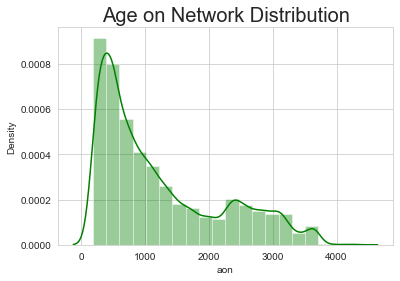

In [139]:
#Describe the Age on Network Distribution
sns.set_style("whitegrid")
sns.distplot(df.aon, bins=20, color="g")
plt.title("Age on Network Distribution", fontsize=20)
plt.show()

In [140]:
df['aon'].describe()

count    69999.000000
mean      1220.639709
std        952.426321
min        180.000000
25%        468.000000
50%        868.000000
75%       1813.000000
max       4337.000000
Name: aon, dtype: float64

In [141]:
df_arpu = df[['arpu_6','arpu_7','arpu_8']]

In [142]:
df_arpu.head()

,arpu_6,arpu_7,arpu_8
0,31.277,87.009,7.527
1,0.000,122.787,42.953
2,60.806,103.176,0.000
3,156.362,205.260,111.095
4,240.708,128.191,101.565


In [143]:
df['3m_arpu'] = df_arpu.mean(axis=1)

In [144]:
df['3m_arpu'].head()

0     41.937667
1     55.246667
2     54.660667
3    157.572333
4    156.821333
Name: 3m_arpu, dtype: float64

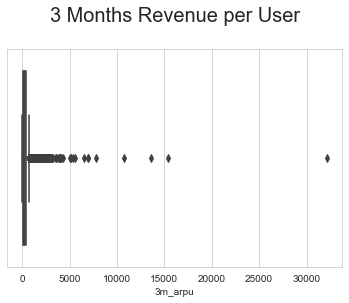

In [145]:
#3 Months Revenue per user
sns.boxplot(df['3m_arpu'])
plt.title("3 Months Revenue per User\n",fontsize=20)
plt.show()


In [146]:
df['3m_arpu'].describe()

count    69999.000000
mean       280.059701
std        310.243414
min         13.426667
25%        105.545833
50%        199.662667
75%        356.245000
max      32140.182000
Name: 3m_arpu, dtype: float64

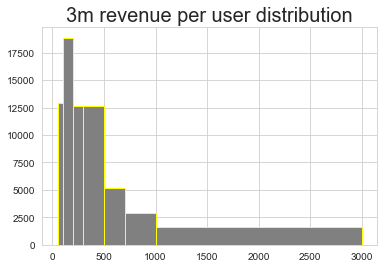

In [147]:
plt.hist(df['3m_arpu'], bins=[50, 100, 200, 300, 500, 700,1000,3000],
         edgecolor="yellow", color="grey")
plt.title("3m revenue per user distribution", fontsize=20)  
plt.show()

In [148]:
## ~85% of the dataset is customers fall under revenue of 500/- .Let us focus our analysis on the 85% of the data.
df = df[df['3m_arpu'] <= 500]

In [149]:
df.shape


(60326, 73)

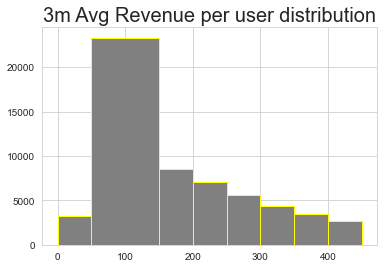

In [150]:
plt.hist(df['3m_arpu'], bins=[0,50, 150, 200, 250, 300, 350,400,450],
         edgecolor="yellow", color="grey")
plt.title("3m Avg Revenue per user distribution", fontsize=20)  
plt.show()

In [151]:
## Drop duplicate columns

df = df.drop(['arpu_6','arpu_7','arpu_8'],axis=1)

In [152]:
#Verify
df.shape


(60326, 70)

In [153]:
df_rech = df[['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']]

In [154]:
df_rech.head()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
0,65,65,10
1,0,145,50
2,70,70,0
3,110,110,50
4,50,41,30


In [155]:
df_rech.describe()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
count,60326.000000,60326.000000,60326.000000
mean,89.106869,87.182193,90.948314
std,88.439297,88.057748,95.392087
min,0.000000,0.000000,0.000000
25%,30.000000,30.000000,30.000000
50%,90.000000,65.000000,50.000000
75%,110.000000,120.000000,130.000000
max,3350.000000,3299.000000,4449.000000


In [156]:
df['3m_rech_amt'] = df_rech.mean(axis=1)

In [157]:
df['3m_rech_amt'].describe()

count    60326.000000
mean        89.079126
std         68.036064
min          0.000000
25%         39.333333
50%         76.666667
75%        121.333333
max       3332.333333
Name: 3m_rech_amt, dtype: float64

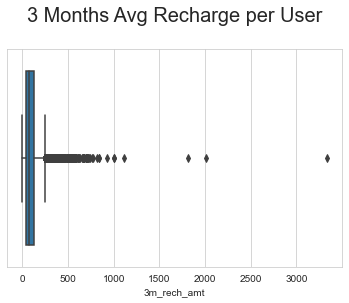

In [158]:
#3 Months Avg Recharge per user
sns.boxplot(df['3m_rech_amt'])
plt.title("3 Months Avg Recharge per User\n",fontsize=20)
plt.show()


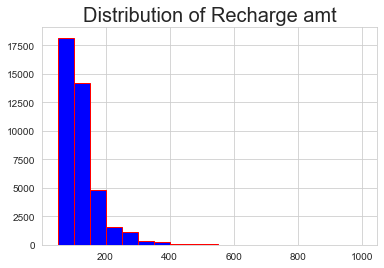

In [159]:
plt.hist(df['3m_rech_amt'], bins=[50, 100, 150, 200, 250, 300,350,400,450,500,550,600,650,700,1000],
         edgecolor="red", color="blue")
plt.title("Distribution of Recharge amt", fontsize=20)  
plt.show()

In [160]:
## ~85% of the dataset is customers fall under 200/- recharge amount .Let us focus our analysis on the 85% of the data.
df = df[df['3m_rech_amt'] <= 200]

In [161]:
df['3m_rech_amt'].describe()

count    57128.000000
mean        78.598481
std         46.457587
min          0.000000
25%         36.666667
50%         71.333333
75%        116.666667
max        200.000000
Name: 3m_rech_amt, dtype: float64

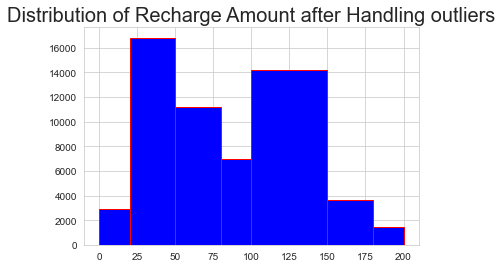

In [162]:
plt.hist(df['3m_rech_amt'], bins=[0,20, 50, 80, 100, 150, 180,200],
         edgecolor="red", color="blue")
plt.title("Distribution of Recharge Amount after Handling outliers", fontsize=20)  
plt.show()

In [163]:
df =df.drop(['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'],axis=1)

In [164]:
df.shape

(57128, 68)

In [165]:
df.head()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability,3m_arpu,3m_rech_amt
0,0,48.58,124.38,1.29,32.24,96.68,2.33,2.23,0.00,0.28,5.29,16.04,2.33,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,65.09,204.99,1.01,8.20,0.63,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,3,2,2,77,65,10,65,65,0,1958,0,41.937667,46.666667
1,1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,30.73,31.66,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,0,0,710,0,55.246667,65.000000
2,2,0.53,15.93,0.00,53.99,82.05,0.00,0.53,12.98,0.00,24.11,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,28.94,84.99,0.00,2.89,1.38,0.00,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,2,4,2,70,120,0,70,50,0,882,0,54.660667,46.666667
3,3,7.26,16.01,0.00,68.76,78.48,50.23,6.99,3.94,0.00,37.91,44.89,23.63,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,16.16,37.99,4.60,14.95,9.13,25.61,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,2,4,3,160,240,130,110,110,50,982,0,157.572333,90.000000
4,4,21.28,4.83,6.13,56.99,38.11,9.63,10.16,4.83,6.13,36.74,19.88,4.61,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,4.35,0.00,0.00,0.00,17.00,0.00,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,25,10,30,647,0,156.821333,40.333333


In [166]:
## Create 3 months avg columns for all minutes of usage fields

df_onnet = df[['onnet_mou_6','onnet_mou_7','onnet_mou_8']]
df['avg_onnet'] = df_onnet.mean(axis=1)

df_offnet = df[['offnet_mou_6','offnet_mou_7','offnet_mou_8']]
df['avg_offnet'] = df_offnet.mean(axis=1)

df_loc_og_t2t = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8']]
df['avg_loc_og_t2t'] = df_loc_og_t2t.mean(axis=1)

df_loc_og_t2m =df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8']]
df['avg_loc_og_t2m'] = df_loc_og_t2m.mean(axis=1)

df_loc_og =df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']]
df['avg_loc_og'] = df_loc_og.mean(axis=1)

df_std_og_t2t = df[['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8']]
df['avg_std_og_t2t'] = df_std_og_t2t.mean(axis=1)

df_std_og_t2m = df[['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']]
df['avg_std_og_t2m'] = df_std_og_t2m.mean(axis=1)

df_std_og =df[['std_og_mou_6','std_og_mou_7','std_og_mou_8']]
df['avg_std_og'] = df_std_og.mean(axis=1)


df_spl_og =df[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8']]
df['avg_spl_og'] = df_spl_og.mean(axis=1)

df_total_og =df[['total_og_mou_6','total_og_mou_7','total_og_mou_8']]
df['avg_total_og'] = df_total_og.mean(axis=1)

df_loc_ic_t2t = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']]
df['avg_loc_ic_t2t'] = df_loc_ic_t2t.mean(axis=1)

df_loc_ic_t2m =df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']]
df['avg_loc_ic_t2m'] = df_loc_ic_t2m.mean(axis=1)

df_loc_ic_t2f =df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']]
df['avg_loc_ic_t2f'] = df_loc_ic_t2f.mean(axis=1)

df_loc_ic =df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']]
df['avg_loc_ic'] = df_loc_ic.mean(axis=1)

df_std_ic_t2t = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8']]
df['avg_std_ic_t2t'] = df_std_ic_t2t.mean(axis=1)

df_std_ic_t2m = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']]
df['avg_std_ic_t2m'] = df_std_ic_t2m.mean(axis=1)

df_std_ic =df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']]
df['avg_std_ic'] = df_std_ic.mean(axis=1)

df_std_ic_t2f =df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8']]
df['avg_std_ic_t2f'] = df_std_ic_t2f.mean(axis=1)


df_rech_num = df[['total_rech_num_6','total_rech_num_7','total_rech_num_8']]
df['avg_rech_num'] = df_rech_num.mean(axis=1)

df_last_rech_amt = df[['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']]
df['avg_last_rech_amt'] = df_last_rech_amt.mean(axis=1)


In [167]:
df = df.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis=1)
df = df.drop(['std_og_mou_6','std_og_mou_7','std_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],axis=1)

In [168]:
df.head()

,id,aon,churn_probability,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_spl_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
0,0,1958,0,41.937667,46.666667,58.083333,43.750000,0.836667,7.886667,8.726667,57.243333,33.120000,90.363333,2.943333,102.173333,4.633333,12.940000,0.000000,17.576667,2.606667,14.126667,16.740000,0.0,2.333333,43.333333
1,1,710,0,55.246667,65.000000,0.000000,18.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.796667,20.796667,10.433333,10.393333,1.803333,22.636667,0.000000,0.000000,0.000000,0.0,4.000000,0.000000
2,2,882,0,54.660667,46.666667,5.486667,45.346667,4.503333,8.036667,12.540000,0.980000,36.996667,37.976667,1.423333,51.950000,5.720000,46.183333,0.000000,51.910000,3.896667,9.023333,12.923333,0.0,2.666667,40.000000
3,3,982,0,157.572333,90.000000,7.756667,65.823333,3.643333,35.476667,39.126667,4.106667,15.286667,19.583333,16.563333,75.283333,17.900000,51.786667,2.680000,72.376667,0.000000,3.993333,3.993333,0.0,3.000000,90.000000
4,4,647,0,156.821333,40.333333,10.746667,34.910000,7.040000,20.410000,33.536667,0.000000,1.450000,1.450000,5.666667,40.653333,3.163333,11.466667,5.093333,19.736667,0.000000,0.000000,0.000000,0.0,10.333333,21.666667


In [169]:
df.shape

(57128, 25)

In [170]:
#df['avg_std_ic_t2f'].describe()
df.describe()

,id,aon,churn_probability,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_spl_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
count,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000
mean,34958.066517,1182.099216,0.111381,188.745706,78.598481,86.960391,133.332370,31.557747,64.953305,98.931587,52.677365,57.903695,111.320152,4.143399,199.095331,42.072427,91.946687,10.555116,144.582707,7.822768,18.037267,27.680674,1.818446,6.652074,45.635544
std,20199.414882,931.143823,0.314607,116.347450,46.457587,141.991062,138.599572,76.859306,76.828283,122.942090,122.022399,118.551652,183.523228,13.550528,208.773503,123.647618,126.394366,33.627851,202.671621,35.748168,65.560535,81.679095,12.195462,4.728024,39.060231
min,0.000000,180.000000,0.000000,13.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17464.750000,459.000000,0.000000,91.828333,36.666667,10.995833,42.490000,3.796667,15.650000,25.631667,0.000000,0.160000,0.839167,0.000000,57.050000,5.900000,25.348333,0.153333,41.353333,0.000000,0.356667,1.443333,0.000000,3.666667,16.666667
50%,34934.500000,834.000000,0.000000,161.878167,71.333333,37.660000,89.356667,14.313333,40.396372,62.145597,1.813333,8.833333,22.168333,1.280000,127.300000,17.745999,57.536667,2.166667,91.534460,0.660000,4.620000,9.343333,0.000000,5.333333,34.666667
75%,52462.250000,1712.000000,0.000000,263.526917,116.666667,97.607725,175.820282,32.823333,85.181667,127.461667,43.908333,59.896908,144.335000,4.293637,271.612500,40.793333,110.644167,8.204779,172.560000,5.707554,15.333700,25.813244,0.715424,8.333333,68.333333
max,69998.000000,4337.000000,1.000000,499.997333,200.000000,3876.580000,1531.530000,3874.740000,1109.550000,4188.120000,2281.093333,1378.200000,2281.093333,1241.440000,4298.993333,6344.394418,3287.790000,1743.376667,6449.658375,3166.416667,5308.960000,5358.946667,948.286667,59.666667,200.000000


In [171]:
df.columns

Index(['id', 'aon', 'churn_probability', '3m_arpu', '3m_rech_amt', 'avg_onnet',
       'avg_offnet', 'avg_loc_og_t2t', 'avg_loc_og_t2m', 'avg_loc_og',
       'avg_std_og_t2t', 'avg_std_og_t2m', 'avg_std_og', 'avg_spl_og',
       'avg_total_og', 'avg_loc_ic_t2t', 'avg_loc_ic_t2m', 'avg_loc_ic_t2f',
       'avg_loc_ic', 'avg_std_ic_t2t', 'avg_std_ic_t2m', 'avg_std_ic',
       'avg_std_ic_t2f', 'avg_rech_num', 'avg_last_rech_amt'],
      dtype='object')

In [172]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
id,57128.0,34958.066517,20199.414882,0.000000,17464.750000,34934.500000,52462.250000,62957.300000,66475.650000,69310.730000,69998.000000
aon,57128.0,1182.099216,931.143823,180.000000,459.000000,834.000000,1712.000000,2742.000000,3104.000000,3651.000000,4337.000000
churn_probability,57128.0,0.111381,0.314607,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3m_arpu,57128.0,188.745706,116.347450,13.426667,91.828333,161.878167,263.526917,368.387400,422.677500,482.107803,499.997333
3m_rech_amt,57128.0,78.598481,46.457587,0.000000,36.666667,71.333333,116.666667,143.333333,164.333333,194.576667,200.000000
avg_onnet,57128.0,86.960391,141.991062,0.000000,10.995833,37.660000,97.607725,225.324333,364.831000,697.245633,3876.580000
avg_offnet,57128.0,133.332370,138.599572,0.000000,42.490000,89.356667,175.820282,299.910667,408.137333,687.086133,1531.530000
avg_loc_og_t2t,57128.0,31.557747,76.859306,0.000000,3.796667,14.313333,32.823333,68.092000,110.035167,296.107667,3874.740000
avg_loc_og_t2m,57128.0,64.953305,76.828283,0.000000,15.650000,40.396372,85.181667,154.715333,214.484000,369.313567,1109.550000
avg_loc_og,57128.0,98.931587,122.942090,0.000000,25.631667,62.145597,127.461667,228.251000,317.969500,557.783133,4188.120000


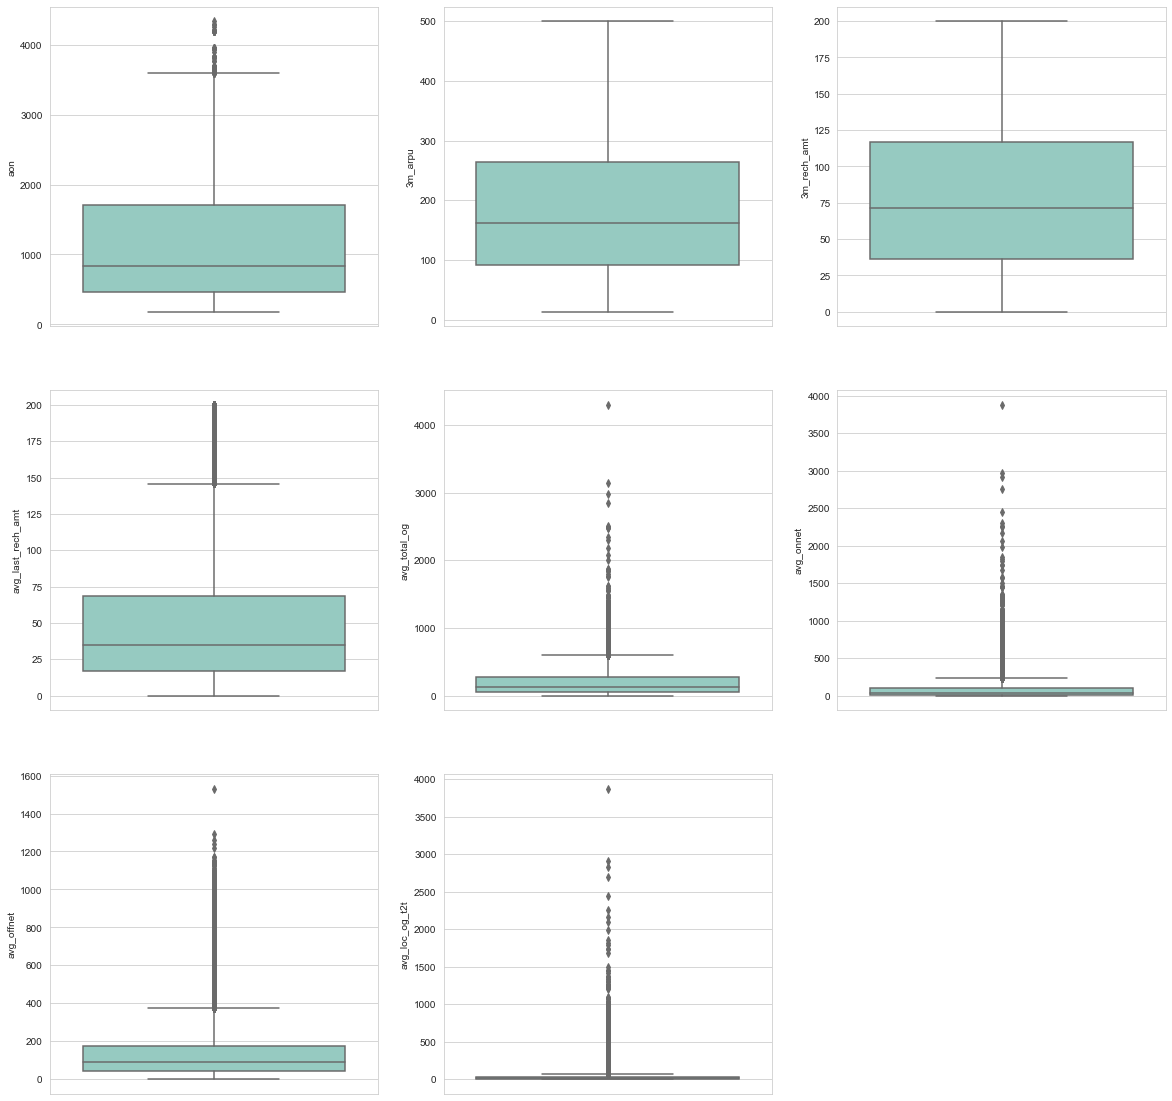

In [173]:
# checking for the outliers in all the columns

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="aon",palette='Set3', data = df)
plt.subplot(3,3,2)
sns.boxplot(y="3m_arpu",palette='Set3', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = '3m_rech_amt', palette='Set3', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'avg_last_rech_amt', palette='Set3', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'avg_total_og', palette='Set3', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'avg_onnet', palette='Set3', data = df)
plt.subplot(3,3,7)
sns.boxplot(y = 'avg_offnet', palette='Set3', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = 'avg_loc_og_t2t', palette='Set3', data = df)


plt.show()

In [174]:
df = df[df['aon'] <= 2000] 

In [175]:
df =df.drop(['avg_std_ic','avg_spl_og'],axis=1)

In [176]:
df = df[df['avg_total_og'] <= 400]  

In [177]:
df = df[df['avg_offnet'] <= 280] 

In [178]:
df[df['avg_onnet'] <= 100] 

,id,aon,churn_probability,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
0,0,1958,0,41.937667,46.666667,58.083333,43.750000,0.836667,7.886667,8.726667,57.243333,33.120000,90.363333,102.173333,4.633333,12.940000,0.000000,17.576667,2.606667,14.126667,0.000000,2.333333,43.333333
1,1,710,0,55.246667,65.000000,0.000000,18.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.796667,10.433333,10.393333,1.803333,22.636667,0.000000,0.000000,0.000000,4.000000,0.000000
2,2,882,0,54.660667,46.666667,5.486667,45.346667,4.503333,8.036667,12.540000,0.980000,36.996667,37.976667,51.950000,5.720000,46.183333,0.000000,51.910000,3.896667,9.023333,0.000000,2.666667,40.000000
3,3,982,0,157.572333,90.000000,7.756667,65.823333,3.643333,35.476667,39.126667,4.106667,15.286667,19.583333,75.283333,17.900000,51.786667,2.680000,72.376667,0.000000,3.993333,0.000000,3.000000,90.000000
4,4,647,0,156.821333,40.333333,10.746667,34.910000,7.040000,20.410000,33.536667,0.000000,1.450000,1.450000,40.653333,3.163333,11.466667,5.093333,19.736667,0.000000,0.000000,0.000000,10.333333,21.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,69991,861,0,84.601667,48.000000,3.970000,52.266667,1.466667,32.460000,34.056667,0.000000,14.923333,14.923333,49.673333,0.000000,11.540000,0.770000,12.310000,0.126667,0.403333,0.000000,3.666667,26.333333
69992,69992,1164,0,51.242000,13.333333,18.480000,24.970000,18.480000,23.586667,42.076667,0.000000,0.000000,0.000000,43.576667,50.793333,53.793333,3.273333,107.870000,0.033333,2.323333,0.286667,7.666667,3.333333
69993,69993,1507,0,186.918333,50.333333,49.243333,146.553333,26.723333,20.280000,47.006667,19.733333,95.756667,115.493333,163.090000,9.980000,15.416667,0.270000,25.670000,1.870000,41.643333,0.000000,13.666667,26.666667
69997,69997,277,0,209.683667,199.000000,9.453333,19.860000,8.410000,6.646667,19.173333,0.716667,7.903333,8.620000,27.796667,5.346667,2.093333,2.476667,9.933333,3.203333,4.036667,0.426667,3.333333,0.000000


<AxesSubplot:ylabel='avg_onnet'>

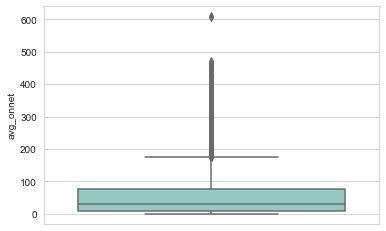

In [179]:
sns.boxplot(y = 'avg_onnet', palette='Set3', data = df)

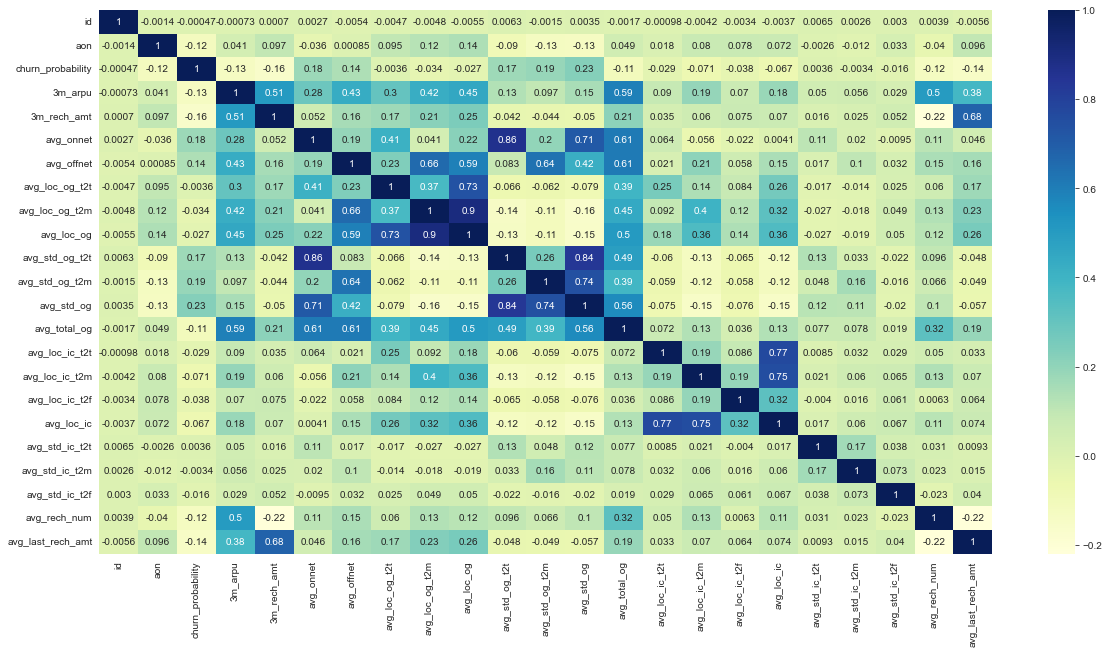

In [180]:
 ## Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),cmap="YlGnBu",annot = True)
plt.show()

In [181]:
df.shape

(36620, 23)

### Model Building

#### Train - Test Split

In [182]:
# Putting feature variable to X
X = df.drop(['churn_probability','id'], axis=1)

X.head()

,aon,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
0,1958,41.937667,46.666667,58.083333,43.750000,0.836667,7.886667,8.726667,57.243333,33.120000,90.363333,102.173333,4.633333,12.940000,0.000000,17.576667,2.606667,14.126667,0.0,2.333333,43.333333
1,710,55.246667,65.000000,0.000000,18.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.796667,10.433333,10.393333,1.803333,22.636667,0.000000,0.000000,0.0,4.000000,0.000000
2,882,54.660667,46.666667,5.486667,45.346667,4.503333,8.036667,12.540000,0.980000,36.996667,37.976667,51.950000,5.720000,46.183333,0.000000,51.910000,3.896667,9.023333,0.0,2.666667,40.000000
3,982,157.572333,90.000000,7.756667,65.823333,3.643333,35.476667,39.126667,4.106667,15.286667,19.583333,75.283333,17.900000,51.786667,2.680000,72.376667,0.000000,3.993333,0.0,3.000000,90.000000
4,647,156.821333,40.333333,10.746667,34.910000,7.040000,20.410000,33.536667,0.000000,1.450000,1.450000,40.653333,3.163333,11.466667,5.093333,19.736667,0.000000,0.000000,0.0,10.333333,21.666667


In [224]:
y = df['churn_probability']

In [225]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [235]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=100)

In [236]:
X_train.head()

,aon,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
29088,1350,137.754667,86.666667,32.296667,208.940000,5.313333,28.700000,34.020000,24.543333,170.936667,195.486667,237.646667,8.740000,47.276667,0.076667,56.100000,0.226667,7.986667,0.000000,4.666667,86.666667
69690,632,56.220667,18.666667,48.086086,145.387859,16.032036,31.620482,48.878829,30.777162,108.009000,139.139617,83.633333,17.898796,40.684910,3.905588,62.495587,3.813406,26.259681,0.691726,3.666667,0.000000
14018,282,257.543000,116.666667,29.076667,271.410000,12.640000,135.216667,147.860000,16.436667,135.803333,152.243333,300.500000,217.160000,275.566667,0.033333,492.766667,25.083333,4.453333,0.000000,4.333333,96.666667
5761,1507,64.967667,30.000000,32.426667,19.793333,32.426667,19.130000,51.740000,0.000000,0.000000,0.000000,54.366667,20.506667,8.156667,12.373333,41.043333,0.000000,0.000000,0.000000,5.666667,13.333333
6989,461,62.620333,49.333333,0.326667,2.583333,0.326667,1.223333,1.553333,0.000000,0.000000,0.000000,3.333333,2.273333,16.760000,4.323333,23.366667,0.000000,0.086667,2.970000,5.000000,36.000000


In [237]:
X_train.columns

Index(['aon', '3m_arpu', '3m_rech_amt', 'avg_onnet', 'avg_offnet',
       'avg_loc_og_t2t', 'avg_loc_og_t2m', 'avg_loc_og', 'avg_std_og_t2t',
       'avg_std_og_t2m', 'avg_std_og', 'avg_total_og', 'avg_loc_ic_t2t',
       'avg_loc_ic_t2m', 'avg_loc_ic_t2f', 'avg_loc_ic', 'avg_std_ic_t2t',
       'avg_std_ic_t2m', 'avg_std_ic_t2f', 'avg_rech_num',
       'avg_last_rech_amt'],
      dtype='object')

#### Feature Scaling

In [241]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = ['aon','3m_arpu','3m_rech_amt','avg_onnet','avg_offnet','avg_loc_og_t2t','avg_loc_og_t2m','avg_loc_og','avg_std_og_t2t','avg_std_og_t2m','avg_std_og','avg_total_og', 'avg_loc_ic_t2t','avg_loc_ic_t2m','avg_loc_ic_t2f','avg_loc_ic','avg_std_ic_t2t','avg_std_ic_t2m','avg_std_ic_t2f','avg_rech_num','avg_last_rech_amt'])
X_train.head()

,aon,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
0,1.250276,-0.175667,0.368565,-0.334385,1.768556,-0.516517,-0.427035,-0.568900,-0.095299,2.952007,1.602636,1.245960,-0.236781,-0.288648,-0.297858,-0.367982,-0.182315,-0.128769,-0.147561,-0.371593,1.312477
1,-0.294778,-1.054681,-1.132751,-0.096967,0.828016,-0.180092,-0.368333,-0.355398,0.012456,1.630186,0.930847,-0.369952,-0.166642,-0.342102,-0.166323,-0.336680,-0.093385,0.148531,-0.080956,-0.604407,-1.081207
2,-1.047938,1.115765,1.030910,-0.382802,2.693082,-0.286557,1.713942,1.066832,-0.235426,2.214017,1.087074,1.905419,1.359314,1.562598,-0.299347,1.769189,0.433984,-0.182389,-0.147561,-0.449197,1.588672
3,1.588122,-0.960380,-0.882532,-0.332430,-1.030722,0.334480,-0.619391,-0.314286,-0.519541,-0.638587,-0.728024,-0.677019,-0.146671,-0.605880,0.124568,-0.441674,-0.187935,-0.249969,-0.147561,-0.138779,-0.712948
4,-0.662750,-0.985687,-0.455687,-0.815102,-1.285422,-0.673031,-0.979314,-1.035403,-0.519541,-0.638587,-0.728024,-1.212462,-0.286303,-0.536114,-0.151973,-0.528188,-0.187935,-0.248654,0.138416,-0.293988,-0.086907


In [242]:
X_train.head()

,aon,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
0,1.250276,-0.175667,0.368565,-0.334385,1.768556,-0.516517,-0.427035,-0.568900,-0.095299,2.952007,1.602636,1.245960,-0.236781,-0.288648,-0.297858,-0.367982,-0.182315,-0.128769,-0.147561,-0.371593,1.312477
1,-0.294778,-1.054681,-1.132751,-0.096967,0.828016,-0.180092,-0.368333,-0.355398,0.012456,1.630186,0.930847,-0.369952,-0.166642,-0.342102,-0.166323,-0.336680,-0.093385,0.148531,-0.080956,-0.604407,-1.081207
2,-1.047938,1.115765,1.030910,-0.382802,2.693082,-0.286557,1.713942,1.066832,-0.235426,2.214017,1.087074,1.905419,1.359314,1.562598,-0.299347,1.769189,0.433984,-0.182389,-0.147561,-0.449197,1.588672
3,1.588122,-0.960380,-0.882532,-0.332430,-1.030722,0.334480,-0.619391,-0.314286,-0.519541,-0.638587,-0.728024,-0.677019,-0.146671,-0.605880,0.124568,-0.441674,-0.187935,-0.249969,-0.147561,-0.138779,-0.712948
4,-0.662750,-0.985687,-0.455687,-0.815102,-1.285422,-0.673031,-0.979314,-1.035403,-0.519541,-0.638587,-0.728024,-1.212462,-0.286303,-0.536114,-0.151973,-0.528188,-0.187935,-0.248654,0.138416,-0.293988,-0.086907


### Random Forest Classification Model

### Initialize and fit the model

In [327]:
rf = RandomForestClassifier(random_state=100, n_estimators=50, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=100)

In [328]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=186422792)

In [329]:
sample_tree = rf.estimators_[10]

### Define Helper function to visualize the graph

In [330]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [331]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

#### With different estimator values

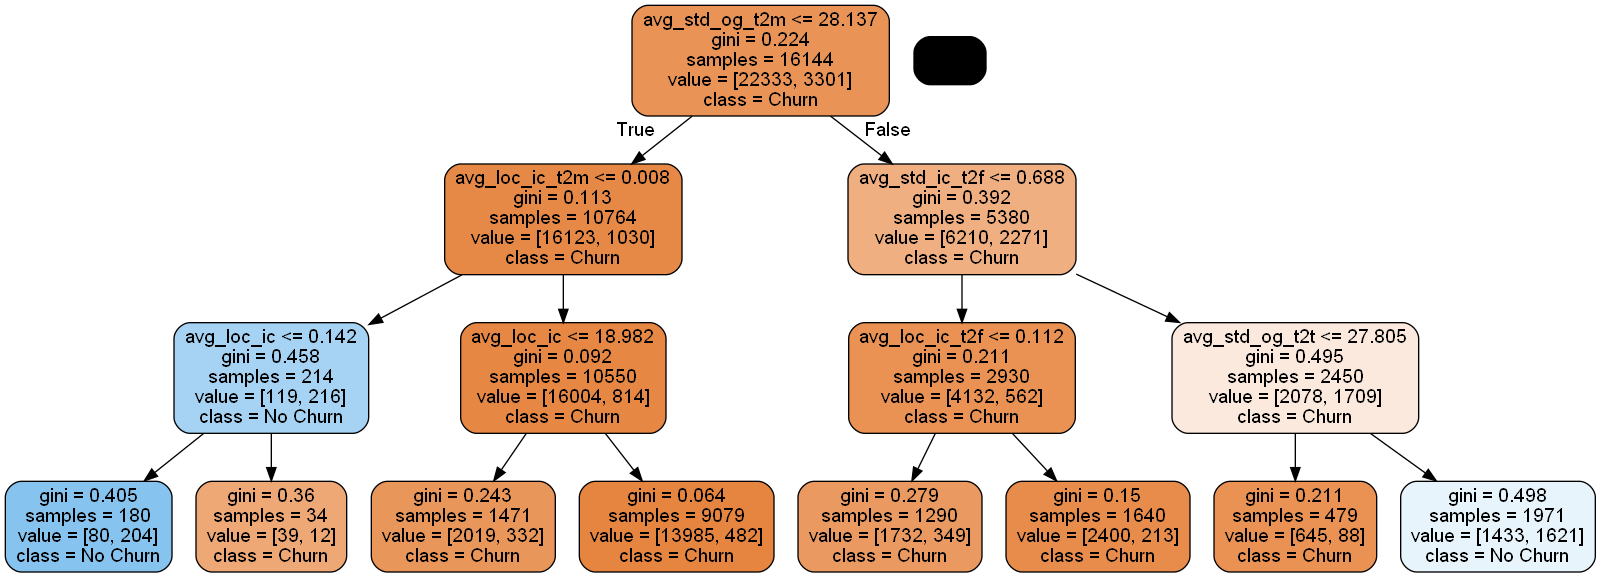

In [332]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=5000, height=5000)

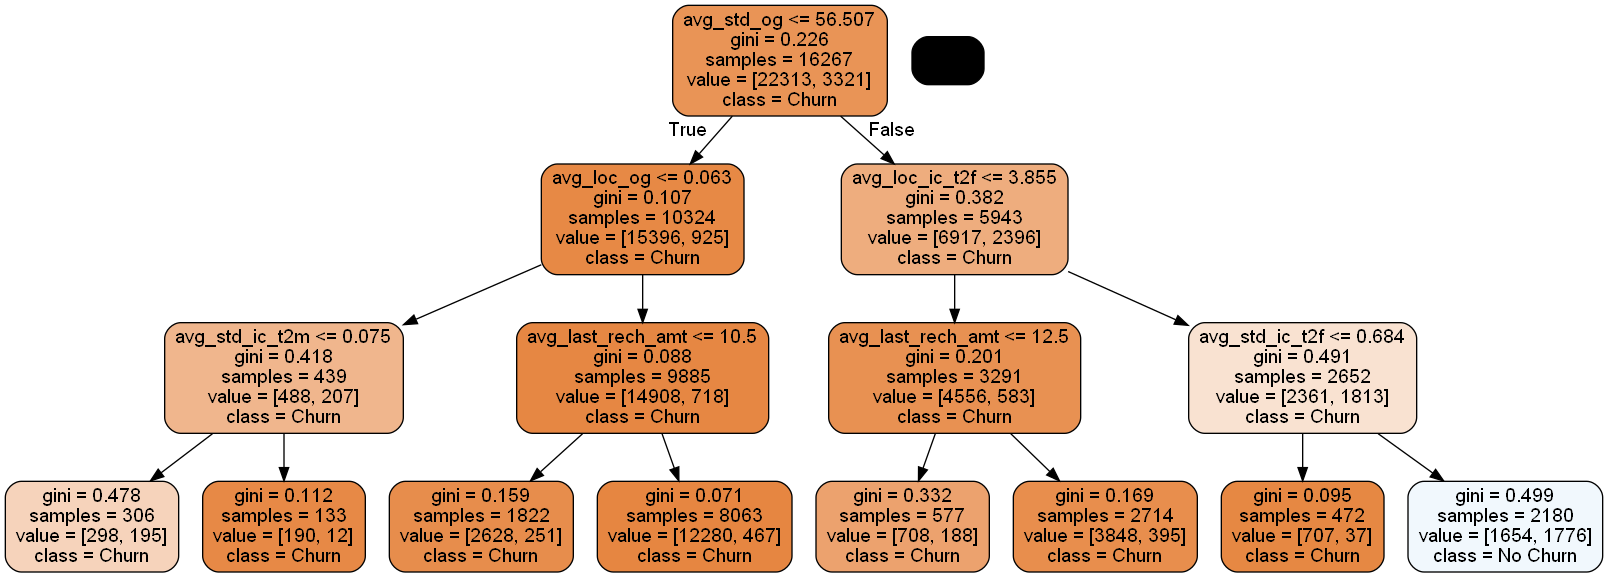

In [333]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=5000, height=5000)

### Evaluate the Model

In [334]:
evaluate_model(rf)

Train Accuracy : 0.8942030116251853
Train Confusion Matrix:
[[21984   303]
 [ 2409   938]]
--------------------------------------------------
Test Accuracy : 0.8896777717094484
Test Confusion Matrix:
[[9407  145]
 [1067  367]]


#### Identify Important Feature Variables

In [335]:
rf.feature_importances_
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": rf.feature_importances_
})

In [336]:
### Important Features which has impact on the churn probability
imp_df.sort_values(by="Imp", ascending=False)

,Feature,Imp
8,avg_std_og_t2t,0.174014
11,avg_total_og,0.136486
18,avg_std_ic_t2f,0.113310
10,avg_std_og,0.102224
9,avg_std_og_t2m,0.097032
14,avg_loc_ic_t2f,0.051478
16,avg_std_ic_t2t,0.050670
13,avg_loc_ic_t2m,0.048189
3,avg_onnet,0.034338
5,avg_loc_og_t2t,0.028530


#### Predict the Model

In [337]:
y_pred_test = rf.predict(X_test)



#### View Accuracy Score

In [338]:
accuracy_score(y_test, y_pred_test)

0.8896777717094484

#### Confusion Matrix

In [339]:
confusion_matrix(y_test, y_pred_test)

array([[9407,  145],
       [1067,  367]], dtype=int64)

#### Generate Other Metrics like Precion , Recall , F1-Score , Support

In [340]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9552
           1       0.72      0.26      0.38      1434

    accuracy                           0.89     10986
   macro avg       0.81      0.62      0.66     10986
weighted avg       0.87      0.89      0.87     10986



### Evaluate the dataset with Other models to compare which model performs better.

### Logistic Regression with PCA

In [341]:
from sklearn.decomposition import PCA

In [342]:
pca = PCA(random_state=42)

In [343]:
df_train_pca = pca.fit_transform(X_train)
df_test_pca =pca.fit_transform(X_test)


In [344]:
pca.components_

array([[ 9.97987631e-01,  7.61339666e-03,  8.88223089e-03,
        -5.53996890e-03,  6.80866588e-04,  7.39076717e-03,
         1.40750848e-02,  2.26018671e-02, -1.25182119e-02,
        -1.35417084e-02, -2.57635806e-02,  8.50324230e-03,
         6.29263656e-03,  2.48386136e-02,  4.60611151e-03,
         3.57394657e-02,  1.88229425e-04, -1.00576371e-03,
         9.02630746e-04, -4.05108247e-04,  7.47292023e-03],
       [-4.85142371e-02,  1.00434325e-01,  1.90126611e-02,
         1.02284148e-02,  6.41321048e-02,  4.11635851e-02,
         8.26929840e-02,  1.26408568e-01, -2.79390068e-02,
        -1.79695627e-02, -4.56008590e-02,  8.06404221e-02,
         4.03257934e-01,  3.67427582e-01,  3.50122149e-02,
         8.05703433e-01,  2.75389852e-03,  2.25286426e-02,
         3.85381847e-03,  2.57710454e-03,  1.55658775e-02],
       [-5.95673807e-03, -3.88623799e-01, -7.28616732e-02,
        -3.17517033e-01, -3.01888204e-01, -6.42276551e-02,
        -1.23143494e-01, -1.90249538e-01, -2.42343351e

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logit = LogisticRegression()

In [346]:
# Fit the model on the data set
pca_x = logit.fit(df_train_pca, y_train)

In [347]:
# Calculate probability of model prediction
pred_probs_test = pca_x.predict_proba(df_test_pca)

In [351]:
# ROC score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.43'


#### Incremental PCA

In [352]:
from sklearn.decomposition import IncrementalPCA

In [353]:
pca_final = IncrementalPCA(n_components=21)

In [354]:
df_train_pca = pca_final.fit_transform(X_train)

In [355]:
df_train_pca.shape

(25634, 21)

In [356]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(10986, 21)

In [357]:
learner_pca = LogisticRegression()

In [358]:
model_pca = learner_pca.fit(df_train_pca, y_train)


In [359]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

#### Area under the ROC curve


In [363]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

### Logistic Regression Model - Without PCA

In [364]:
### We already have data into X and y variables

In [365]:
X

,aon,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2t,avg_loc_og_t2m,avg_loc_og,avg_std_og_t2t,avg_std_og_t2m,avg_std_og,avg_total_og,avg_loc_ic_t2t,avg_loc_ic_t2m,avg_loc_ic_t2f,avg_loc_ic,avg_std_ic_t2t,avg_std_ic_t2m,avg_std_ic_t2f,avg_rech_num,avg_last_rech_amt
0,1958,41.937667,46.666667,58.083333,43.750000,0.836667,7.886667,8.726667,57.243333,33.120000,90.363333,102.173333,4.633333,12.940000,0.000000,17.576667,2.606667,14.126667,0.000000,2.333333,43.333333
1,710,55.246667,65.000000,0.000000,18.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.796667,10.433333,10.393333,1.803333,22.636667,0.000000,0.000000,0.000000,4.000000,0.000000
2,882,54.660667,46.666667,5.486667,45.346667,4.503333,8.036667,12.540000,0.980000,36.996667,37.976667,51.950000,5.720000,46.183333,0.000000,51.910000,3.896667,9.023333,0.000000,2.666667,40.000000
3,982,157.572333,90.000000,7.756667,65.823333,3.643333,35.476667,39.126667,4.106667,15.286667,19.583333,75.283333,17.900000,51.786667,2.680000,72.376667,0.000000,3.993333,0.000000,3.000000,90.000000
4,647,156.821333,40.333333,10.746667,34.910000,7.040000,20.410000,33.536667,0.000000,1.450000,1.450000,40.653333,3.163333,11.466667,5.093333,19.736667,0.000000,0.000000,0.000000,10.333333,21.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,1164,51.242000,13.333333,18.480000,24.970000,18.480000,23.586667,42.076667,0.000000,0.000000,0.000000,43.576667,50.793333,53.793333,3.273333,107.870000,0.033333,2.323333,0.286667,7.666667,3.333333
69993,1507,186.918333,50.333333,49.243333,146.553333,26.723333,20.280000,47.006667,19.733333,95.756667,115.493333,163.090000,9.980000,15.416667,0.270000,25.670000,1.870000,41.643333,0.000000,13.666667,26.666667
69995,712,238.328000,59.333333,181.876667,64.623333,15.450000,52.903333,69.033333,166.420000,9.640000,176.063333,246.546667,27.350000,28.583333,0.863333,56.803333,40.713333,11.836667,0.000000,8.333333,40.666667
69997,277,209.683667,199.000000,9.453333,19.860000,8.410000,6.646667,19.173333,0.716667,7.903333,8.620000,27.796667,5.346667,2.093333,2.476667,9.933333,3.203333,4.036667,0.426667,3.333333,0.000000


In [366]:
y

0        0
1        0
2        0
3        0
4        0
        ..
69992    0
69993    0
69995    0
69997    0
69998    0
Name: churn_probability, Length: 36620, dtype: int64

In [367]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [368]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                25634
Model:                            GLM   Df Residuals:                    25612
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7066.7
Date:                Wed, 11 May 2022   Deviance:                       14133.
Time:                        16:38:59   Pearson chi2:                 2.46e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4324      0.078     -5.553      0.000      -0.585      -0.280
aon                  -0.0004    5.6e-05     -6.400      0.000      -0.000      -0.000
3m_arpu               0.0055      0.001     10.049      0.000       0.004       0.007
3m_rech_amt          -0.0120      0.001    -13.247      0.000      -0.014      -0.010
avg_onnet             0.0094      0.002      5.990      0.000       0.006       0.013
avg_offnet            0.0150      0.001     10.858      0.000       0.012       0.018
avg_loc_og_t2t       -0.0029      0.007     -0.423      0.672      -0.017       0.011
avg_loc_og_t2m       -0.0084      0.007     -1.282      0.200      -0.021       0.004
avg_loc_og            0.0048      0.006      0.737      0.461      -0.008       0.018
avg_std_og_t2t        0.0039      0.009      0.440      0.660      -0.014       0.022
avg_std_og_t2m       -0.0015      0.009     -0.169      0.866      -0.018       0.015
avg_std_og            0.0024      0.009      0.275      0.783      -0.015       0.019
avg_total_og         -0.0139      0.000    -32.111      0.000      -0.015      -0.013
avg_loc_ic_t2t       96.1259      6.423     14.967      0.000      83.538     108.714
avg_loc_ic_t2m       96.1249      6.423     14.966      0.000      83.537     108.713
avg_loc_ic_t2f       96.1254      6.423     14.966      0.000      83.537     108.714
avg_loc_ic          -96.1259      6.423    -14.967      0.000    -108.714     -83.538
avg_std_ic_t2t        0.0001      0.001      0.172      0.864      -0.001       0.001
avg_std_ic_t2m       -0.0008      0.001     -1.582      0.114      -0.002       0.000
avg_std_ic_t2f       -0.0046      0.005     -0.960      0.337      -0.014       0.005
avg_rech_num         -0.1329      0.010    -13.596      0.000      -0.152      -0.114
avg_last_rech_amt    -0.0118      0.001    -11.502      0.000      -0.014      -0.010
=====================================================================================
"""

In [369]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True  True  True  True False  True False  True False False  True
  True False False False False False False  True  True]
[ 6  1  1  1  1 10  1  3  1  9  8  1  1 12  7  2 11  5  4  1  1]


In [370]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('aon', False, 6),
 ('3m_arpu', True, 1),
 ('3m_rech_amt', True, 1),
 ('avg_onnet', True, 1),
 ('avg_offnet', True, 1),
 ('avg_loc_og_t2t', False, 10),
 ('avg_loc_og_t2m', True, 1),
 ('avg_loc_og', False, 3),
 ('avg_std_og_t2t', True, 1),
 ('avg_std_og_t2m', False, 9),
 ('avg_std_og', False, 8),
 ('avg_total_og', True, 1),
 ('avg_loc_ic_t2t', True, 1),
 ('avg_loc_ic_t2m', False, 12),
 ('avg_loc_ic_t2f', False, 7),
 ('avg_loc_ic', False, 2),
 ('avg_std_ic_t2t', False, 11),
 ('avg_std_ic_t2m', False, 5),
 ('avg_std_ic_t2f', False, 4),
 ('avg_rech_num', True, 1),
 ('avg_last_rech_amt', True, 1)]

In [371]:
X_rfe = X_train.columns[rfe.support_]
X_rfe

Index(['3m_arpu', '3m_rech_amt', 'avg_onnet', 'avg_offnet', 'avg_loc_og_t2m',
       'avg_std_og_t2t', 'avg_total_og', 'avg_loc_ic_t2t', 'avg_rech_num',
       'avg_last_rech_amt'],
      dtype='object')

In [372]:
#X_train_rfe = sm.add_constant(X_train[['3m_arpu','3m_rech_amt','avg_onnet','avg_offnet','avg_loc_og_t2m','avg_loc_og','avg_std_og_t2t','avg_total_og','avg_loc_ic_t2t','avg_loc_ic','avg_std_ic_t2m','avg_std_ic_t2f','avg_rech_num','avg_last_rech_amt']])
X_train_rfe = sm.add_constant(X_train[['3m_arpu','3m_rech_amt','avg_onnet','avg_offnet','avg_loc_og_t2m','avg_std_og_t2t','avg_total_og','avg_loc_ic_t2t','avg_loc_ic','avg_rech_num','avg_last_rech_amt']])

In [373]:
X_train_rfe.head()

,const,3m_arpu,3m_rech_amt,avg_onnet,avg_offnet,avg_loc_og_t2m,avg_std_og_t2t,avg_total_og,avg_loc_ic_t2t,avg_loc_ic,avg_rech_num,avg_last_rech_amt
12862,1.0,307.577667,123.333333,78.733333,238.923333,200.693333,2.216667,314.623333,63.72,113.423333,4.000000,60.000000
16371,1.0,193.474000,161.000000,1.063333,13.366667,12.926667,0.000000,14.433333,7.94,35.156667,3.666667,109.666667
10128,1.0,176.299667,148.000000,2.270000,38.270000,37.666667,0.253333,40.550000,3.14,59.223333,3.666667,48.333333
40086,1.0,68.951667,66.000000,10.670000,28.396667,24.973333,0.000000,39.076667,15.60,90.776667,8.333333,5.000000
68367,1.0,75.577667,36.666667,87.266667,3.770000,3.770000,82.016667,91.036667,0.00,0.000000,5.333333,20.000000


In [374]:
logm1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                25634
Model:                            GLM   Df Residuals:                    25622
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7227.4
Date:                Wed, 11 May 2022   Deviance:                       14455.
Time:                        16:39:02   Pearson chi2:                 6.42e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0492      0.066    -15.905      0.000      -1.179      -0.920
3m_arpu               0.0055      0.001     10.600      0.000       0.004       0.006
3m_rech_amt          -0.0127      0.001    -14.032      0.000      -0.014      -0.011
avg_onnet             0.0097      0.001     10.623      0.000       0.008       0.012
avg_offnet            0.0168      0.000     37.669      0.000       0.016       0.018
avg_loc_og_t2m       -0.0069      0.001     -7.864      0.000      -0.009      -0.005
avg_std_og_t2t        0.0067      0.001      6.378      0.000       0.005       0.009
avg_total_og         -0.0145      0.000    -36.006      0.000      -0.015      -0.014
avg_loc_ic_t2t        0.0027      0.001      5.218      0.000       0.002       0.004
avg_loc_ic           -0.0027      0.000     -6.556      0.000      -0.004      -0.002
avg_rech_num         -0.1358      0.010    -14.182      0.000      -0.155      -0.117
avg_last_rech_amt    -0.0117      0.001    -11.492      0.000      -0.014      -0.010
=====================================================================================
"""

In [375]:
#X_train_rfe.drop(['avg_loc_og','avg_loc_og_t2m','avg_std_ic_t2f','avg_std_ic_t2m'],axis=1,inplace=True)

In [376]:
import statsmodels.api as am
model = am.OLS(y_train , X_train_rfe)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     848.7
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        16:39:03   Log-Likelihood:                -4504.2
No. Observations:               25634   AIC:                             9032.
Df Residuals:                   25622   BIC:                             9130.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1778      0.005     33.094      0.000       0.167       0.188
3m_arpu               0.0004   3.89e-05      9.251      0.000       0.000       0.000
3m_rech_amt          -0.0010   6.77e-05    -14.056      0.000      -0.001      -0.001
avg_onnet             0.0021   6.26e-05     33.795      0.000       0.002       0.002
avg_offnet            0.0025   4.17e-05     61.128      0.000       0.002       0.003
avg_loc_og_t2m       -0.0004   5.57e-05     -6.591      0.000      -0.000      -0.000
avg_std_og_t2t        0.0004   6.86e-05      6.205      0.000       0.000       0.001
avg_total_og         -0.0023   3.53e-05    -66.400      0.000      -0.002      -0.002
avg_loc_ic_t2t     5.983e-05   2.25e-05      2.662      0.008    1.58e-05       0.000
avg_loc_ic        -6.343e-05   1.51e-05     -4.197      0.000   -9.31e-05   -3.38e-05
avg_rech_num         -0.0096      0.001    -14.468      0.000      -0.011      -0.008
avg_last_rech_amt    -0.0007   7.05e-05    -10.529      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     8274.527   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25982.597
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                       6.624   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Based ont he model perfomancw acros the multiple models Random Forest, logistic regression with /without PCA, it is quiet evident that Random Forest clasifier provides much beterr suited for classification prdiction churn/no churn